In [148]:
from qiskit import *
from qiskit.visualization import *

In [149]:
secret_number = bin(122)[2:]
reversed_secret_number = reversed(secret_number)
secret_number_length = len(secret_number)
secret_number_range = range(secret_number_length)

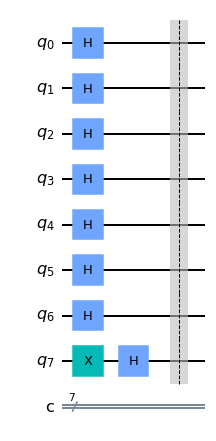

In [150]:
circuit = QuantumCircuit(secret_number_length + 1, secret_number_length)
circuit.h(secret_number_range)
circuit.x(secret_number_length)
circuit.h(secret_number_length)
circuit.barrier()
circuit.draw('mpl')

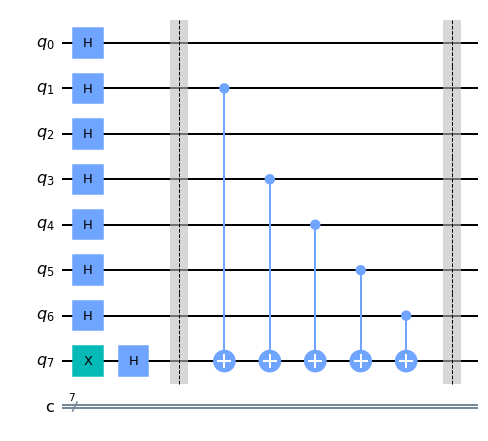

In [151]:
for pos, char in enumerate(reversed_secret_number):
    if char == '1':
        circuit.cx(pos, secret_number_length)
circuit.barrier()
circuit.draw('mpl')

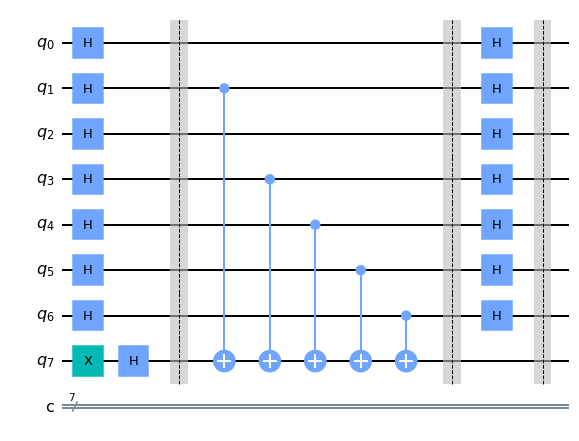

In [152]:
circuit.h(secret_number_range)
circuit.barrier()
circuit.draw('mpl')

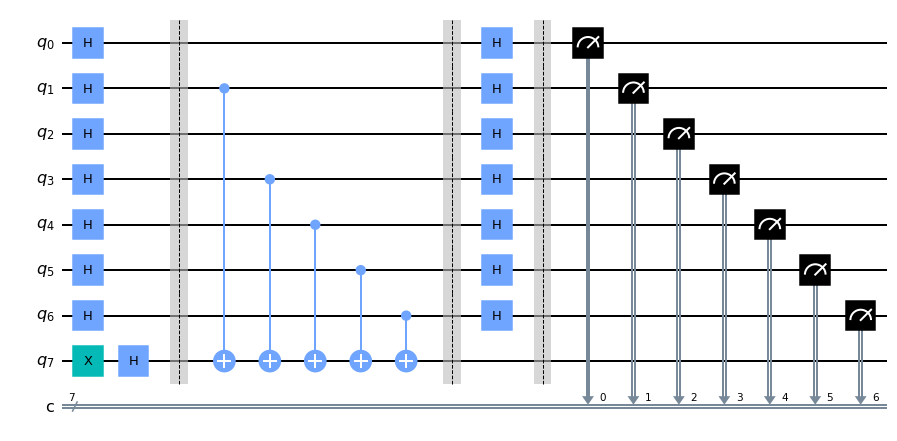

In [153]:
circuit.measure(secret_number_range, secret_number_range)
circuit.draw('mpl')

In [158]:
circuit.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[7];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
x q[7];
h q[7];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
cx q[1],q[7];
cx q[3],q[7];
cx q[4],q[7];
cx q[5],q[7];
cx q[6],q[7];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];



In [154]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1111010': 1}


In [155]:
print(int(list(counts.keys())[0], 2))

122
